<h4>Cat Vs Dog image classification using cnn</h4>

Importing required libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam

In [9]:
from os import listdir
import matplotlib.pyplot as plt
from sklearn import metrics
import os

Data Preprocessing

In [16]:
# setting path of training and validation datset
train_dir="train"
val_dir="validation"

# create ImageDataGeneratior for data augmentation
train_dataGen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_dataGen=ImageDataGenerator(rescale=1./255)

# flow data from directories
train_generator=train_dataGen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')
val_generator=train_dataGen.flow_from_directory(val_dir,
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 20124 images belonging to 2 classes.
Found 4840 images belonging to 2 classes.


Defining the cnn model

In [31]:
model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),MaxPooling2D(2,2),
                  Conv2D(64,(3,3),activation='relu'),MaxPooling2D(2,2),
                  Conv2D(128,(3,3),activation='relu'),MaxPooling2D(2,2),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dropout(0.5),
                  Dense(1,activation='sigmoid')])
model.summary()

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Train the model

In [42]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples//val_generator.batch_size
)

Epoch 1/20
596/628 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - accuracy: 0.6591 - loss: 0.6164

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


628/628 ━━━━━━━━━━━━━━━━━━━━ 230s 366ms/step - accuracy: 0.6596 - loss: 0.6160 - val_accuracy: 0.7159 - val_loss: 0.5646
Epoch 2/20
  1/628 ━━━━━━━━━━━━━━━━━━━━ 2:49 270ms/step - accuracy: 0.6875 - loss: 0.5787

C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


628/628 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.6875 - loss: 0.5787 - val_accuracy: 0.7105 - val_loss: 0.5697
Epoch 3/20
628/628 ━━━━━━━━━━━━━━━━━━━━ 218s 348ms/step - accuracy: 0.6846 - loss: 0.5888 - val_accuracy: 0.7301 - val_loss: 0.5426
Epoch 4/20
628/628 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8438 - loss: 0.5094 - val_accuracy: 0.7179 - val_loss: 0.5500
Epoch 5/20
628/628 ━━━━━━━━━━━━━━━━━━━━ 216s 344ms/step - accuracy: 0.7085 - loss: 0.5602 - val_accuracy: 0.7254 - val_loss: 0.5397
Epoch 6/20
628/628 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7500 - loss: 0.4702 - val_accuracy: 0.7279 - val_loss: 0.5388
Epoch 7/20
628/628 ━━━━━━━━━━━━━━━━━━━━ 216s 345ms/step - accuracy: 0.7254 - loss: 0.5428 - val_accuracy: 0.7428 - val_loss: 0.5259
Epoch 8/20
628/628 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7188 - loss: 0.5381 - val_accuracy: 0.7347 - val_loss: 0.5335
Epoch 9/20
628/628 ━━━━━━━━━━━━━━━━━━━━ 216s 343ms/step - accuracy: 0.7384 - loss: 0.5275 - val

Evaluating the model

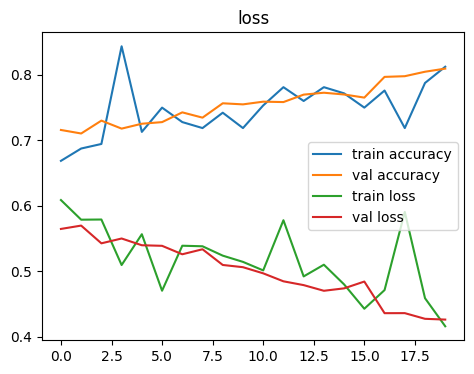

In [43]:
# plotting the accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.title("loss")
plt.show()


Model Evaluation

In [44]:
val_loss,val_acc=model.evaluate(val_generator)
print("Validation accuracy:",val_acc*100)

152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.8049 - loss: 0.4253
Validation accuracy: 80.72314262390137
